In [1]:
import time
import sys
sys.path.append('../')
from pinn_magnetic_experimental import MultiPoleModel
import smtf_utility as util


TensorFlow version: 2.15.0


In [2]:
sim = util.bf_simulator([1, 1.33, 1.66, 1.99], 30, scale=1e9)
sim.add_dipole(0.5, 0,0,1,0,0)
sim.add_dipole(0,0.25,0,0,2,0)
sim.add_dipole(0,0,.15,0,0,3)

positions, values = sim.get_data()
positions, values = util.shuffle_data(positions, values)

In [3]:
model = MultiPoleModel(moments=3, lrate=0.0009, optimizer='rmsprop', loss='huber', scale=1e9, early_stop=False, target_stop=1)
test_epochs = 2000

In [4]:
start = time.time()
model.fit(positions, values, epochs=test_epochs)
end = time.time()

epoch  0 --- Loss --- 122.69132
epoch  1 --- Loss --- 117.8655
epoch  2 --- Loss --- 113.11451
epoch  3 --- Loss --- 108.56436
epoch  4 --- Loss --- 104.117294
epoch  5 --- Loss --- 99.668724
epoch  6 --- Loss --- 95.40742
epoch  7 --- Loss --- 91.383194
epoch  8 --- Loss --- 87.38694
epoch  9 --- Loss --- 83.433105
epoch  10 --- Loss --- 79.4728
epoch  11 --- Loss --- 75.504654
epoch  12 --- Loss --- 71.69946
epoch  13 --- Loss --- 68.12368
epoch  14 --- Loss --- 64.55936
epoch  15 --- Loss --- 60.985558
epoch  16 --- Loss --- 57.451115
epoch  17 --- Loss --- 54.08552
epoch  18 --- Loss --- 50.68283
epoch  19 --- Loss --- 47.584538
epoch  20 --- Loss --- 44.644905
epoch  21 --- Loss --- 41.78548
epoch  22 --- Loss --- 39.164127
epoch  23 --- Loss --- 36.814087
epoch  24 --- Loss --- 34.782246
epoch  25 --- Loss --- 33.003452
epoch  26 --- Loss --- 31.795652
epoch  27 --- Loss --- 30.858242
epoch  28 --- Loss --- 29.97444
epoch  29 --- Loss --- 29.142056
epoch  30 --- Loss --- 28.35648

In [5]:
ellapsed_minutes = ((end - start) / 60)
print("Total training time: " + str(ellapsed_minutes) + " minutes")

Total training time: 38.37425399621328 minutes


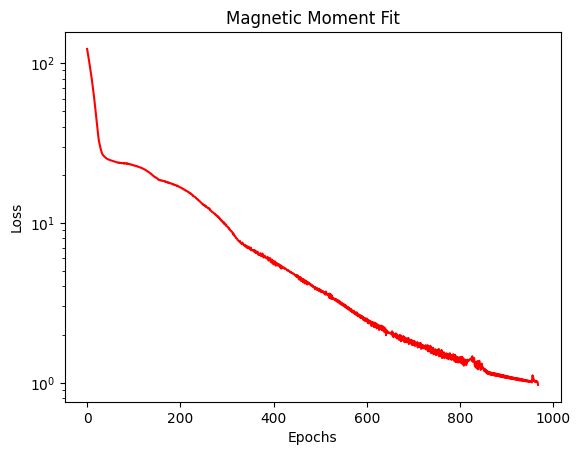

In [6]:
import matplotlib.pyplot as plt

y_axis = model.loss_history
x_axis = [*range(0, len(y_axis), 1)]

plt.plot(x_axis, y_axis, 'r-')
plt.yscale("log")
#plt.xscale("log")
plt.title('Magnetic Moment Fit')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [7]:
model.moment()

---- Moment  0 -----
Position:  [[-0.01114551 -0.00417499  0.15122022]]
Value:     [[0.03504786 0.11871025 2.9238992 ]]
---- Moment  1 -----
Position:  [[-0.00131071  0.26270255  0.0021187 ]]
Value:     [[-0.01282187  1.8506846  -0.03856136]]
---- Moment  2 -----
Position:  [[ 0.5037911  -0.00549239 -0.01648609]]
Value:     [[0.96446705 0.02802571 0.10049613]]
